In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv("train.csv", header = 0, delimiter = ",")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


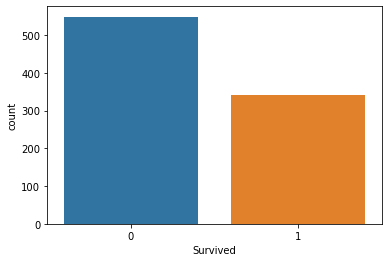

In [15]:
data['Survived'].value_counts
sns.countplot(x = data['Survived'])
data.info()

In [5]:
X = data[['Pclass', 'SibSp', 'Parch']].values   #importand, clean data variables (columns)
y = data['Survived'].values                     #already labeld 0, 1


In [6]:
sc = StandardScaler()   #makes each variable equally important
X = sc.fit_transform(X)
X[:10]

array([[ 0.82737724,  0.43279337, -0.47367361],
       [-1.56610693,  0.43279337, -0.47367361],
       [ 0.82737724, -0.4745452 , -0.47367361],
       [-1.56610693,  0.43279337, -0.47367361],
       [ 0.82737724, -0.4745452 , -0.47367361],
       [ 0.82737724, -0.4745452 , -0.47367361],
       [-1.56610693, -0.4745452 , -0.47367361],
       [ 0.82737724,  2.24747049,  0.76762988],
       [ 0.82737724, -0.4745452 ,  2.00893337],
       [-0.36936484,  0.43279337, -0.47367361]])

In [13]:
#try for models 

LR =  LogisticRegression(random_state = 0)
clf = svm.SVC()
rfc = RandomForestClassifier(n_estimators=200)
mlpc  = MLPClassifier(hidden_layer_sizes = (10,8,6), max_iter = 500)

models = np.array([LR, clf, rfc, mlpc])
pred_models = np.zeros(4)
for i in range (4):
    models[i].fit(X,y)
    print('Model' ,models[i], 'performs like this:\n')
    
    print(classification_report(y, models[i].predict(X) ))
    print(confusion_matrix(y, models[i].predict(X)), '\n')
    

Model LogisticRegression(random_state=0) performs like this:

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       549
           1       0.63      0.44      0.52       342

    accuracy                           0.69       891
   macro avg       0.67      0.64      0.64       891
weighted avg       0.68      0.69      0.67       891

[[460  89]
 [190 152]] 

Model SVC() performs like this:

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       549
           1       0.64      0.58      0.61       342

    accuracy                           0.71       891
   macro avg       0.69      0.69      0.69       891
weighted avg       0.71      0.71      0.71       891

[[435 114]
 [143 199]] 

Model RandomForestClassifier(n_estimators=200) performs like this:

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       549
           1       0.66 

# Conclusion:
The majority of the people that were identified by the models as 0 (dead), were identified correctly. <br>
Around half of the people that were identified by the models as 1 (survived), were identified wrongly. 
